In [1]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [2]:
%%bash
cd .. && make clean && make

In file included from src/Exercice5_students.cpp:7:
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
  if ( val != configMap.end() ) {
       ^~~~~~~~~~~~~~~~~~~~~~
src/Exercice5_students.cpp:163:33: note: in instantiation of function template specialization 'ConfigFile::get<double>' requested here
        const double tfin = configFile.get<double>("tfin");
                                       ^
src/ConfigFile.tpp:74:10: note: uninitialized use occurs here
  return out;
         ^~~
src/ConfigFile.tpp:67:3: note: remove the 'if' if its condition is always true
  if ( val != configMap.end() ) {
  ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/ConfigFile.tpp:66:8: note: initialize the variable 'out' to silence this warning
  T out;
       ^
        = 0.0
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
  if ( val != configMap.end() ) 

In [3]:
config_name = 'bassindefault'
conf = load_conf(config_name)

g = 9.81

In [4]:
tfin = (conf['xR']-conf['xL']) * 4 / np.sqrt(conf['h00']*g)

dataset = run_with_params(
    config_name,
    gen_variations({
        'CFL': [0.5, 1, 1.01, 1.5],
        'tfin': [tfin]
    })
)

Running simulations... Done 4/4


[ConfigFile] Ligne sans '=' : "[ConfigFile] Ligne sans '=' : "# Physique :# Physique :""

[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"


# Stabilité? stabilitéééé! (right)

In [5]:
def show_afewseconds(datass, index):
    params, x, v, f, _ = datass
    index_2s = np.argmin(np.abs(f[:,0]-1.15))
    plt.plot(x, f[index_2s,1:], 'x-', markersize=5)
    plt.xlabel(r'$x$ [m]')
    plt.ylabel(r'$y$ [m]')
    plt.ylim(-3, 3)
    plt.grid()
    plt.savefig(export_path + 'bassin_default_CFL'+str(params['CFL'])+'_1.15s.pdf')
    plt.show()

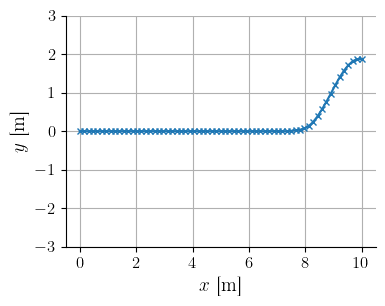

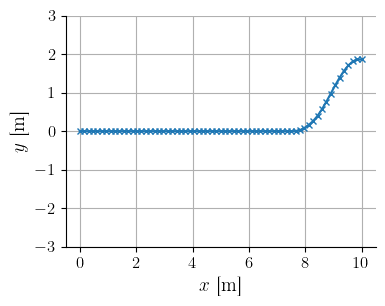

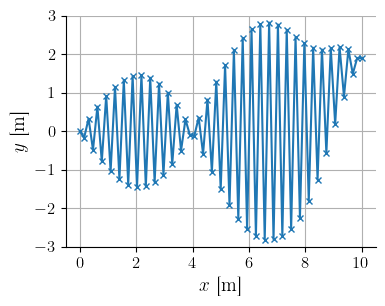

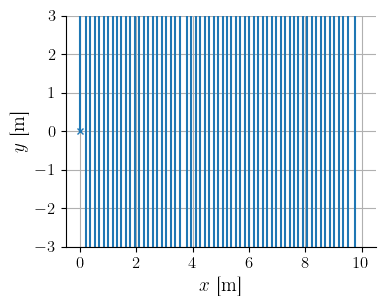

In [6]:
%matplotlib inline

for i in range(4):
    show_afewseconds(datass = dataset[i], index=i)


In [7]:
# import matplotlib.animation as mpla

# %matplotlib qt

# # 0 for slow, 1 for normal, 2 for destroyed, 3 for nuked
# selected = 3

# params, x, v, f, _ = dataset[selected]

# plt.figure(figsize=(8, 8))

# line, = plt.plot(x, f[0,1:], 'x-', markersize=5)
# size = f.shape[0]

# def animate(i) -> Any:
#     idx = i % size
#     line.set_data(x, f[idx,1:])

# anim = mpla.FuncAnimation(plt.gcf(), animate, interval=20, cache_frame_data=True, frames=size)

# plt.xlabel(r'$x$ [m]')
# plt.ylabel(r'$y$ [m]')
# plt.ylim(-2, 2)
# plt.grid()

# Plots!

In [8]:
tfin = (conf['xR']-conf['xL']) * 4 / np.sqrt(conf['h00']*g)
CFL = np.geomspace(0.8, 1.2)

dataset = run_with_params(
    config_name,
    gen_variations({
        'CFL': CFL,
        'tfin': [tfin]
    })
)

[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :[ConfigFile] Ligne sans '=' : "# Physique :"
"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFil

Running simulations... Done 50/50


In [9]:
max_amplitude = []
for datas in dataset:
    params, x, v, f, _ = datas
    max = np.max(f[-1][1:])
    max_amplitude.append(max)

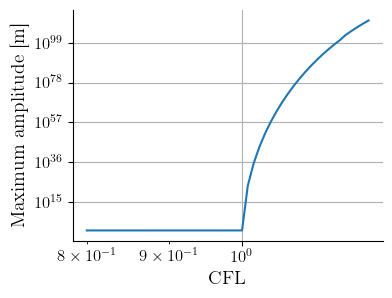

In [11]:
plt.loglog(CFL, max_amplitude)

plt.xlabel('CFL')
plt.ylabel('Maximum amplitude [m]')
plt.grid()

plt.savefig(export_path + 'bassin_default_CFL_stability.pdf')